# Autolib electric car-sharing EDA and Hypothesis testing

## 1. Defining the Question

### a) Specifying the Data Analytic Question

I'll be working as a Data Scientist for Autolib, an electric car-sharing business, to look into a claim concerning blue cars based on the Autolib dataset. 

In order to accomplish so, we must first choose specific places and time periods of interest through sampling, explaining why we chose that strategy, and then conduct hypothesis testing on the claim we have made.


#### What is our research question/hypothesis?

* A z-score is used to test hypotheses.

* A representative sample from each postal region was chosen. The hypothesis was also tested at a 95 percent confidence level.

Hypothesis testing (using a z-score).

A sample from each postal area has been used. A 95% confidence level has also been used to test the hypothesis.

Null Hypothesis: The number of Bluecars taken from postal code 75015 is the same as in postal code 75017 during weekdays

(μ1=μ2)

Alternative Hypothesis: The number of Bluecars taken from postal code 75015 is not the same as in postal code 75017 during weekdays

(μ1≠μ2)

### b) Defining the Metric for Success

The project will be considered as success if we fail to reject the null hypothesis.

### c) Understanding the context


Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

### d) Recording the Experimental Design


For this analysis will follow the following steps below

* Loading and previewing data
* Data cleanining
* EDA
* Implementing the solution
* Challenging the solution
* Follow up question

### e) Data Relevance


### 2. Reading the Data

##### Importing our Libraries

In [529]:
# Importing the libraries we will need 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.naive_bayes import GaussianNB
from scipy.stats import poisson
from statsmodels.stats.power import TTestIndPower


%matplotlib inline

#### Reading the Dataset from our CSV file

##### The dataset we will use contains inforamtion about an electric car-sharing(Bluecar) service company.

In [491]:
url = 'http://bit.ly/DSCoreAutolibDataset'

df = pd.read_csv(url)


### 3. Checking the Data

In [492]:
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


##### Accessing Information about our Dataset

In [493]:
# We can getting to know more about the dataset by accessing its information 
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [494]:
df.shape

# We have 16086 rows and 13 columns

(16085, 13)

### 4. Tidying the Dataset

##### Checking and Dealing with Null

In [495]:
total = df.isnull().sum().sort_values(ascending=False)
percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
Postal code,0,0.0
date,0,0.0
n_daily_data_points,0,0.0
dayOfWeek,0,0.0
day_type,0,0.0
BlueCars_taken_sum,0,0.0
BlueCars_returned_sum,0,0.0
Utilib_taken_sum,0,0.0
Utilib_returned_sum,0,0.0
Utilib_14_taken_sum,0,0.0


In [496]:
# From the above table we do not have any null values

##### Checking for Duplicates

In [497]:
df.duplicated().sum()

0

In [498]:
# From the above we can see that we do not have any duplicate values in our dataset

#### Checking for Outliers

C:\Users\HP\AppData\Local\Temp/ipykernel_10924/4208188532.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  col_names = df.drop(['Postal code','date','day_type','dayOfWeek'],1)


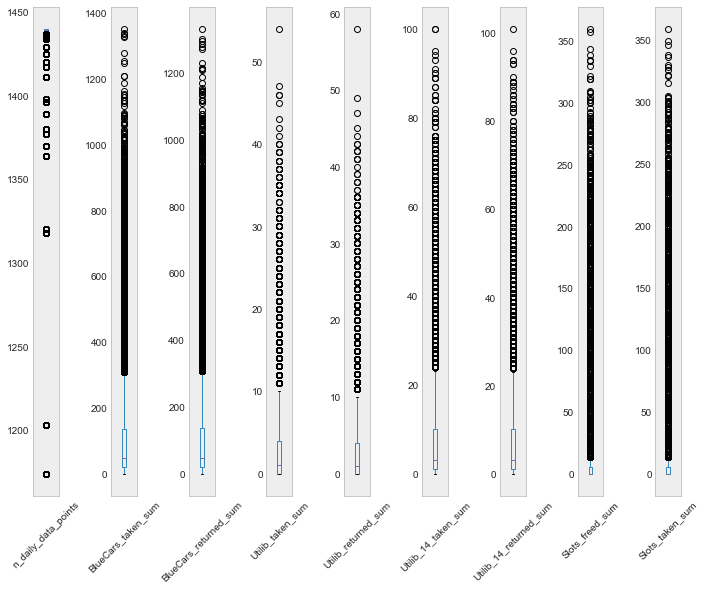

In [499]:
# Checking for Outliers
sns.set_style("whitegrid")


def outlier_visualiser(dataset_name, numeric_columns_list, width=9, height=9):
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size
    plt.style.use('bmh')
    
    next_figure = 1
    for col in numeric_columns_list:
        plt.subplot(1, len(numeric_columns_list), next_figure)
        dataset_name.boxplot(col, rot = 45,grid=False)
        next_figure = next_figure + 1

    plt.subplots_adjust(left = 1, right= 2,hspace= 2, wspace=2)
    plt.show()
    
#we define our numeric columns list in our dataset then call the funtion for visual display
col_names = df.drop(['Postal code','date','day_type','dayOfWeek'],1)
outlier_visualiser(df, col_names.columns)

In [500]:
# Removing Outliers

q3 = df.quantile(0.75)
q1 = df.quantile(0.25)

iqr = q3-q1

outliers = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]
print(outliers.shape)

(9783, 13)


C:\Users\HP\AppData\Local\Temp/ipykernel_10924/4193475719.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]


In [501]:
# We successfully removed the outliers from our dataset

In [502]:
# Checking datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [503]:
#Converting the dayOfWeek column to actual days for easier visualiztion
#
df['dayOfWeek'] = df.dayOfWeek.map({0:"Monday", 1:"Tuesday",2:"Wednesday",3:"Thursday", 4:"Friday",5:"Saturday",6:"Sunday"})
df['dayOfWeek'].head()

0       Monday
1      Tuesday
2    Wednesday
3     Thursday
4       Friday
Name: dayOfWeek, dtype: object

### 5. Exploratory Analysis

#### a). Univerate Analysis

In [504]:
# Checking for the Categorial Data
# Station Type

pd.crosstab(index=df['day_type'], columns='count')

col_0,count
day_type,
weekday,11544
weekend,4541


In [505]:
# We have more counts on Weekdays than weekends

In [506]:
# Date

pd.crosstab(index=df['date'], columns='count').sort_values(by='count', ascending=False)

col_0,count
date,
6/9/2018,104
5/2/2018,104
5/30/2018,104
2/1/2018,104
5/29/2018,104
...,...
3/29/2018,102
2/7/2018,102
3/14/2018,101


In [507]:
# We can see that 6/9/2018 was the most popular date

In [508]:
# Numerical columns of interest

# Top days (identifier of weekday (0: Monday -> 6: Sunday))

df['dayOfWeek'].value_counts().sort_values(ascending=False)


Monday       2374
Tuesday      2363
Sunday       2274
Friday       2271
Wednesday    2268
Thursday     2268
Saturday     2267
Name: dayOfWeek, dtype: int64

In [509]:
# We can see Monday is the most popular day

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


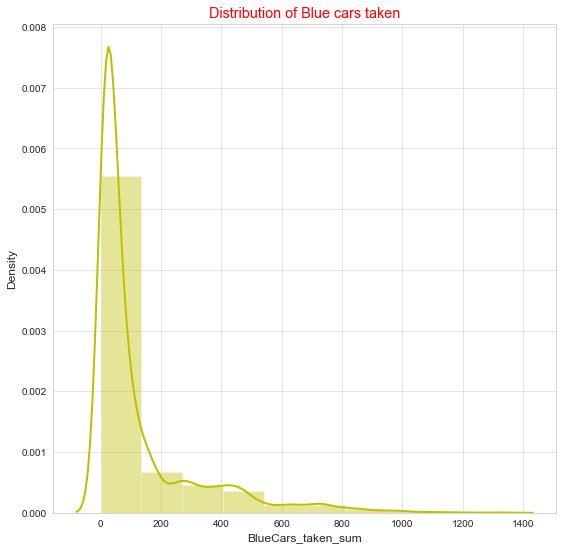

In [510]:
# Plotting bluecars taken
sns.set_style("whitegrid")

sns.distplot(df['BlueCars_taken_sum'], bins=10, color='y')
plt.title('Distribution of Blue cars taken', color = 'red')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


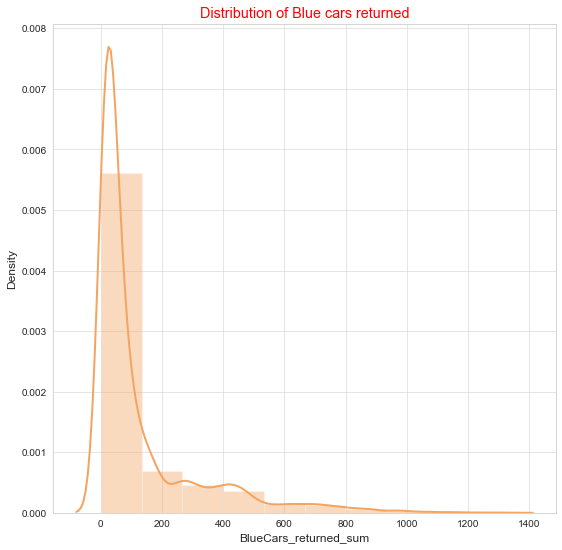

In [511]:
# Plotting bluecars returned
sns.set_style("whitegrid")

sns.distplot(df['BlueCars_returned_sum'], bins=10,color='sandybrown')
plt.title('Distribution of Blue cars returned',color = 'red')
plt.show()

#### b). Bivariate Analysis

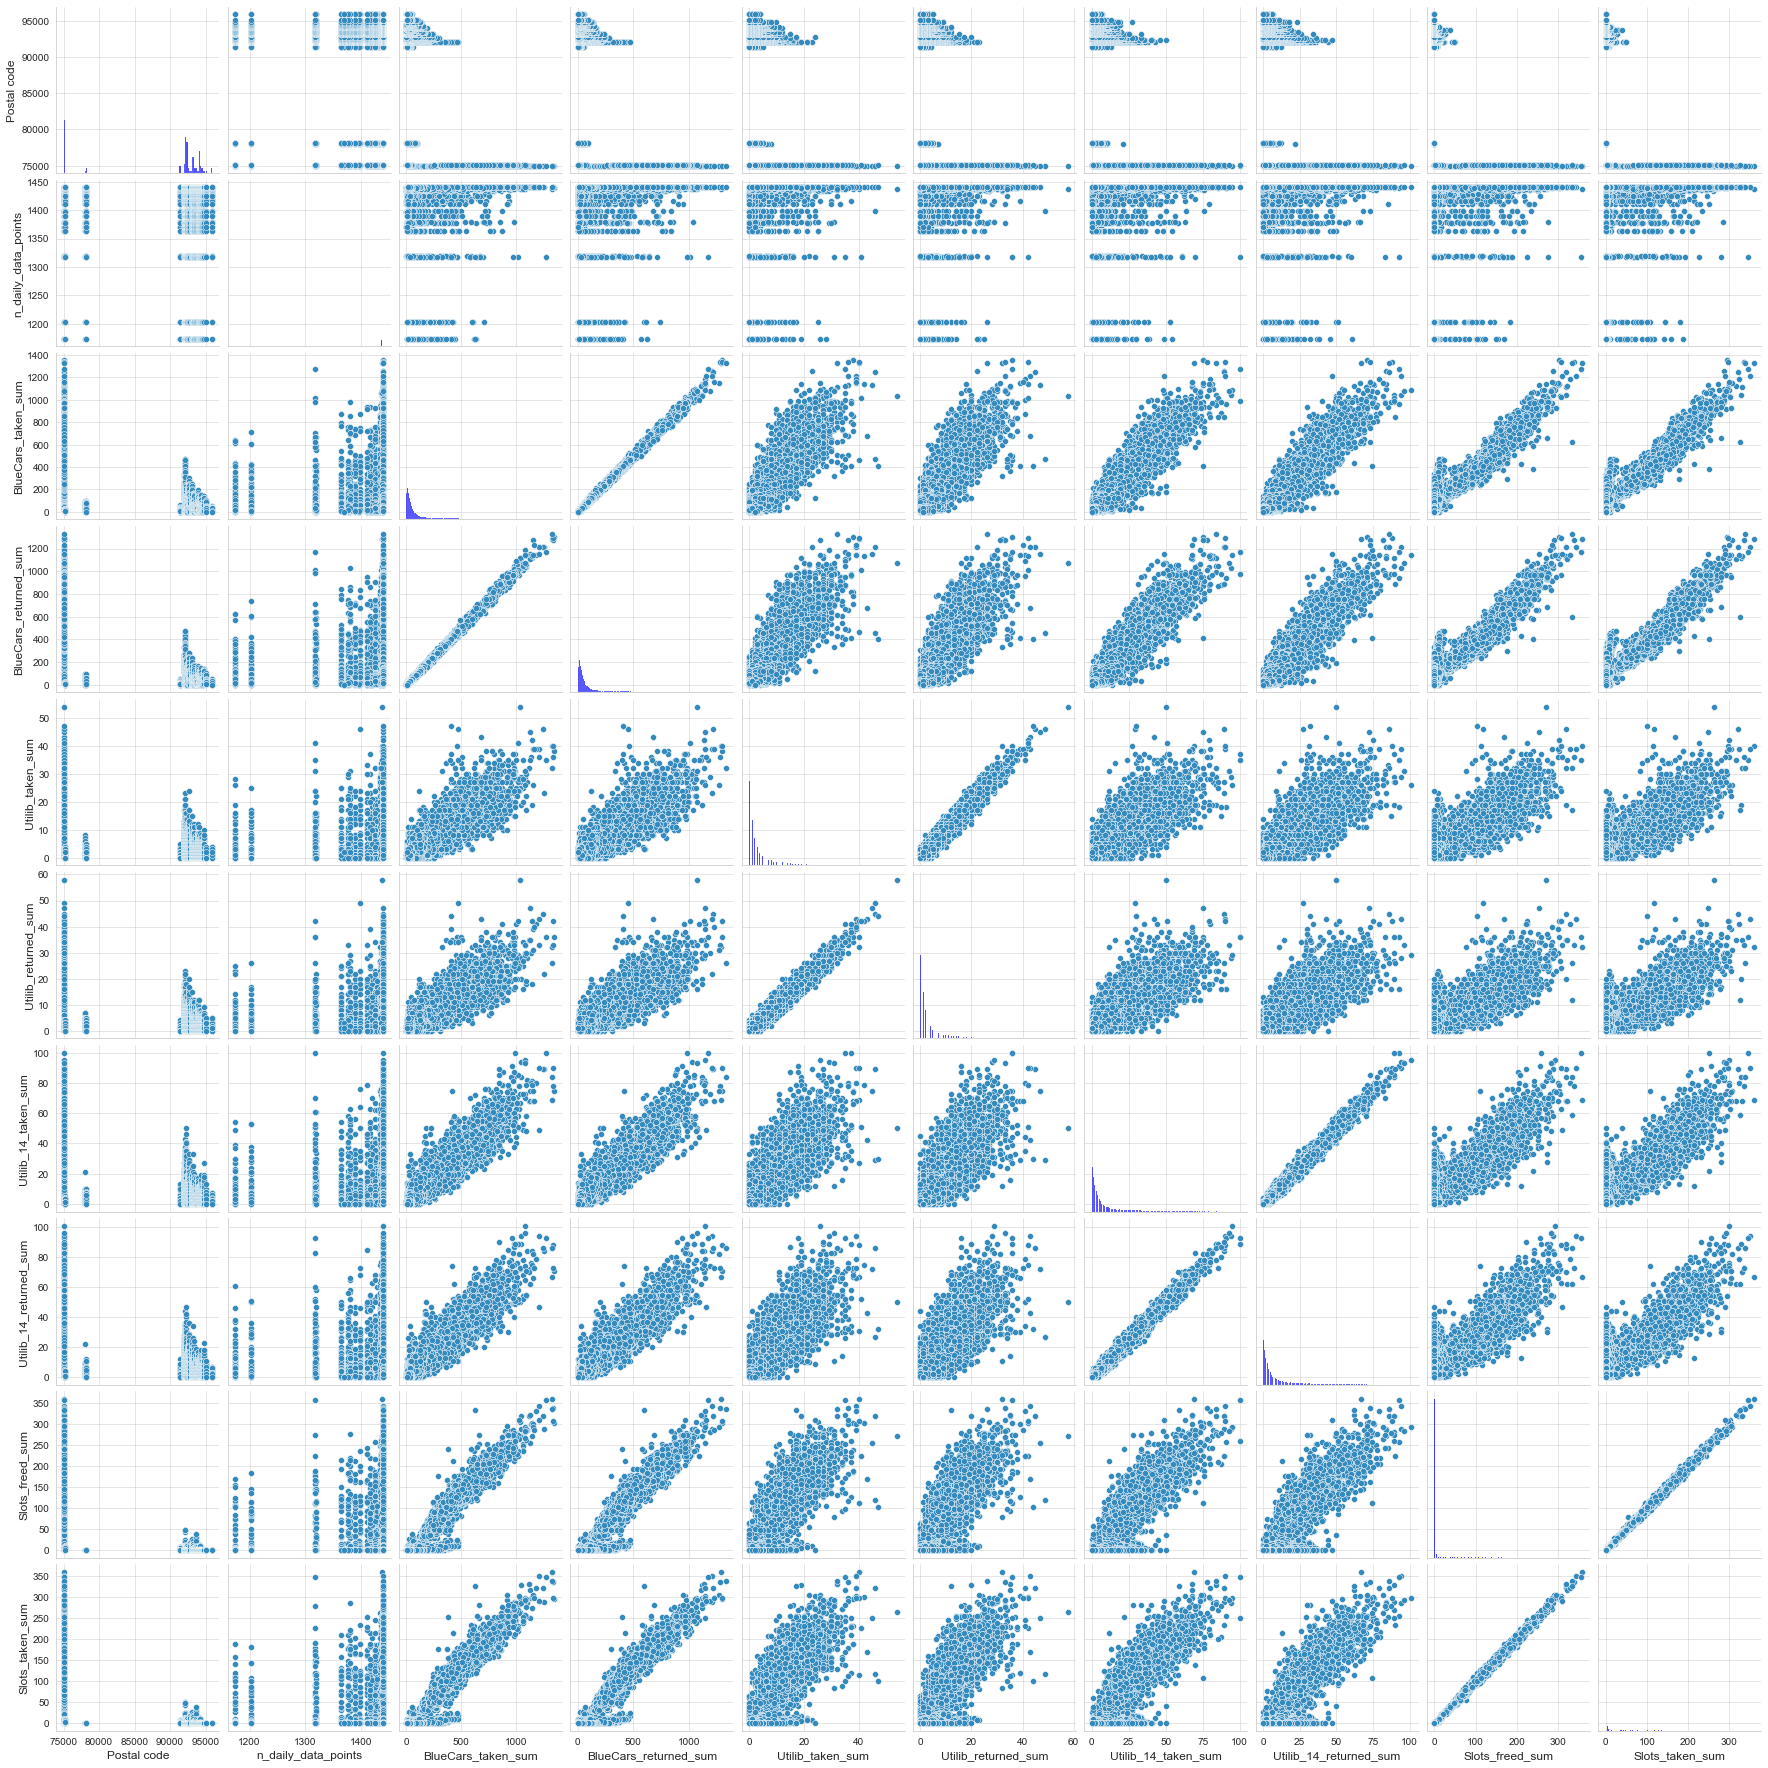

In [512]:
# Ploting the bivariate summaries and recording our observations

sns.set_style("whitegrid")

sns.pairplot(df)
plt.show()

In [513]:
# Checking the skewness
df[['BlueCars_taken_sum','BlueCars_returned_sum']].skew()

BlueCars_taken_sum       2.406355
BlueCars_returned_sum    2.412085
dtype: float64

In [514]:
# Both BlueCars_taken_sum and BlueCars_returned_sum are positive skewed, this shows low existence of outliers

In [515]:
# Checking the kurtosis
df[['BlueCars_taken_sum','BlueCars_returned_sum']].kurt()

BlueCars_taken_sum       6.172692
BlueCars_returned_sum    6.186288
dtype: float64

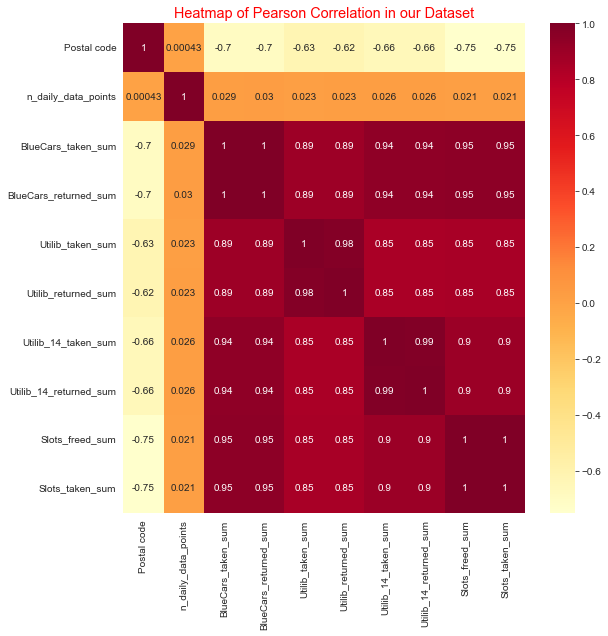

In [516]:
# Checking the Pearson's correlation

sns.set_style("whitegrid")

sns.heatmap(df.corr(),annot=True,cmap='YlOrRd')
plt.title('Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


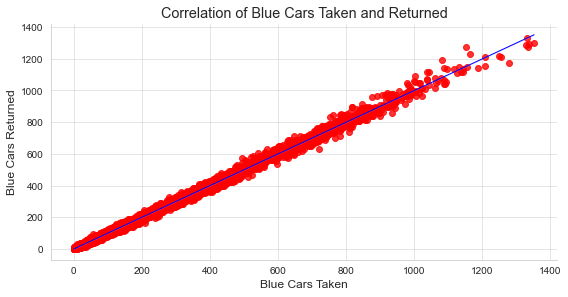

In [517]:
# Ccatter plot of blue cars taken and blue cars returned

sns.set_style("whitegrid")

sns.lmplot('BlueCars_taken_sum', "BlueCars_returned_sum", df, scatter_kws={'marker':'o', 'color': 'red'}, 
           line_kws={'linewidth':1,'color':'blue'}, height = 4, aspect = 2)

plt.title("Correlation of Blue Cars Taken and Returned")
plt.xlabel('Blue Cars Taken')
plt.ylabel("Blue Cars Returned")
plt.show()

### 6. Hypothesis Testing

#### a) Sampling

In statistical analysis, sampling is the process of selecting a specific number of observations from a larger population. Simple random sampling or systematic sampling may be used to sample from a broader population, depending on the type of study being performed.

Stratified random sampling is a sampling method in which a population is divided into smaller groupings called strata. The strata are generated based on the members' shared features or characteristics in stratified random sampling or stratification.

In this anaylsis, we shall use the stratified random sampling method

In [440]:
sample_df= df.groupby('dayOfWeek',group_keys=False).apply(lambda x : x.sample(frac = 0.3))
sample_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
6776,92250,3/16/2018,1440,Friday,weekday,52,58,3,4,7,10,4,4
12971,94000,1/5/2018,1440,Friday,weekday,104,103,5,5,6,4,0,0
6062,92200,6/1/2018,1440,Friday,weekday,71,73,0,2,6,6,0,0
9131,92410,4/13/2018,1439,Friday,weekday,13,13,0,0,0,3,0,0
11095,93260,3/16/2018,1440,Friday,weekday,36,40,0,0,8,7,2,2


In [445]:
#Sample mean and sample standard deviation of BlueCars_taken_sum and BlueCars_returned_sum

sample_mean_taken = df.BlueCars_taken_sum.mean()
sample_mean_returned = df.BlueCars_returned_sum.mean()
sample_std_taken = df.BlueCars_taken_sum.std()
sample_std_returned = df.BlueCars_returned_sum.std()
print("Sample mean of taken: ",sample_mean_taken)
print("Sample mean of returned: ",sample_mean_returned)
print("Sample standard deviation of taken: ",sample_std_taken)
print("Sample standard deviation of returned: ",sample_std_returned)

Sample mean of taken:  125.92695057506994
Sample mean of returned:  125.912713708424
Sample standard deviation of taken:  185.42657876727893
Sample standard deviation of returned:  185.50153480148427


In [520]:
from scipy.stats import shapiro 

# testing for normality for Bluecars Taken 
stat, p = shapiro(df['BlueCars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.661, p=0.000
Sample does not look Gaussian


C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [453]:
# Randomly determining the probability that 134 bluecars were taken  on Monday 
Monday = df[df.dayOfWeek == "Monday"]

Taken_On_Monday  = Monday.BlueCars_taken_sum.mean()
poisson.pmf(134,Taken_On_Monday)

0.003814196831599258

In [454]:
# Randomly determining the probability that 134 bluecars were taken  on Monday 
Monday = df[df.dayOfWeek == "Monday"]

Taken_On_Monday  = Monday.BlueCars_taken_sum.mean()
poisson.pmf(134,Taken_On_Monday)

0.003814196831599258

#### b). Confidence Interval

In [521]:
# let's get the confidence interval for the Mean of blue cars taken
import math

sample_mean_taken = df.BlueCars_taken_sum.mean()
sample_std_taken = df.BlueCars_taken_sum.std()

confidence_interval_taken = sample_std_taken/math.sqrt(df.shape[0])
print("The confidence interval for the mean of blue cars taken is",confidence_interval_taken)

The confidence interval for the mean of blue cars taken is 1.4620473998895005


In [522]:
# let's get the confidence interval for the Mean of blue cars returned
import math

sample_mean_returned = df.BlueCars_returned_sum.mean()
sample_std_returned = df.BlueCars_returned_sum.std()

confidence_interval_returned = sample_std_returned/math.sqrt(df.shape[0])
print("The confidence interval for the mean of blue cars returned is",confidence_interval_returned)

The confidence interval for the mean of blue cars returned is 1.462638411575336


#### c). Specifying the Hypotheses

A sample from each postal area has been used. A 95% confidence level has also been used to test the hypothesis.

Null Hypothesis: The number of Bluecars taken from postal code 75015 is the same as in postal code 75017 during weekdays

(μ1=μ2)

Alternative Hypothesis: The number of Bluecars taken from postal code 75015 is not the same as in postal code 75017 during weekdays

(μ1≠μ2)

Statistical test: sample z-test

Signifance level, alpha = 0.05

In [481]:
#The Z-test of the blue cars that are taken.
ztest ,pval = weightstats.ztest(df.BlueCars_taken_sum, x2=None, value=156)
print(float(pval))
if pval<0.05:
    print("We Reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

5.188380588043504e-94
We Reject the null hypothesis


In [482]:
#The Z-test of the blue cars that are returned.
ztest ,pval = weightstats.ztest(df.BlueCars_returned_sum, x2=None, value=156)
print(float(pval))
if pval<0.05:
    print("We Reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

5.038442026287065e-94
We Reject the null hypothesis


#### d). Power of Test

In [526]:
effect_size = 0.7

alpha = 0.05

power = 0.9

p_analysis = TTestIndPower()

sample_size = p_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)

print("Required Sample Size: " + str(sample_size)) #Since the sample size is returned as a float, 
# we convert it to string using str() while printing it. Running this code will yield the following output:


Required Sample Size: 43.87040750089834


<Figure size 432x288 with 0 Axes>

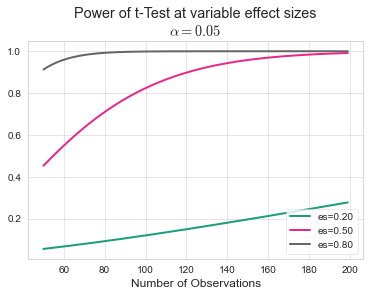

In [530]:
fig = plt.figure()

fig = TTestIndPower().plot_power(dep_var='nobs',

                                nobs= np.arange(50, 200),

                                effect_size=np.array([0.2, 0.5, 0.8]),

                                alpha=0.01,

                                title='Power of t-Test at variable effect sizes\n' + r'$\alpha = 0.05$')

plt.show()

In [ ]:
# Increasing the sample size and effect size can boost the power of the experiment, 
# as seen in the graph. The more powerful the experiment will be 
# if the effect and sample sizes are large while all other variables remain constant.

### 7. Conclusion

We successfully developed the null and alternate hypotheses, implemented the sampling technique, and conducted hypothesis testing, resulting in the null hypothesis being rejected. We can conclude that the number of Bluecars taken from postal code 75015 is not the same as postal code 75017 during weekdays. The test's low power is one problem that has to be looked at further. The target population's large variance may have influenced the test statistic, increasing the chances of a Type I error.